In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [40]:
# Load the os library
import os

# Load the request module
import urllib.request

# Import SSL which we need to setup for talking to the HTTPS server
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# Create a directory
try: 
    os.mkdir('crop')

    # Now perform the following 100 times:
    for img_i in range(1, 101):

        # create a string using the current loop counter
        f = 'crop' % img_i

        # and get the url with that string appended the end
        url = 'https://s3.amazonaws.com/cadl/celeb-align/' + f

        # We'll print this out to the console so we can see how far we've gone
        print(url, end='\r')

        # And now download the url to a location inside our new directory
        urllib.request.urlretrieve(url, os.path.join('crop', f))
except:
    #os.rm('img_align_celeba')
    print("You may need to delete the existing 'img_align_celeba' folder in your directory")

You may need to delete the existing 'img_align_celeba' folder in your directory


In [4]:
import os

files = os.listdir('crop')# img.<tab>
import matplotlib.pyplot as plt
import numpy as np

print(os.path.join('crop', files[0]))
plt.imread(os.path.join('crop', files[0]))

files = [os.path.join('crop', file_i)
 for file_i in os.listdir('crop')
 if '.jpg' in file_i]

# There should be 100 files, with the last one being number 99

img = plt.imread(files[99])

print(img)

crop/t3_p2beo2.jpg
[[[208 209 204]
  [208 209 204]
  [207 208 203]
  ...
  [141 138 131]
  [140 137 130]
  [140 137 130]]

 [[209 210 205]
  [209 210 205]
  [208 209 204]
  ...
  [138 135 128]
  [138 135 128]
  [137 134 127]]

 [[210 211 206]
  [209 210 205]
  [209 210 205]
  ...
  [137 134 127]
  [137 134 127]
  [136 133 126]]

 ...

 [[211 212 207]
  [211 212 207]
  [212 213 208]
  ...
  [122 119 112]
  [126 123 116]
  [129 126 119]]

 [[210 211 206]
  [211 212 207]
  [211 212 207]
  ...
  [124 121 114]
  [128 125 118]
  [131 128 121]]

 [[210 211 206]
  [210 211 206]
  [211 212 207]
  ...
  [124 121 114]
  [128 125 118]
  [131 128 121]]]


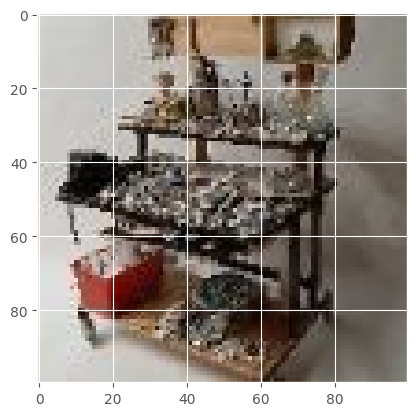

In [5]:
# If nothing is drawn and you are using notebook, try uncommenting the next line:
#%matplotlib inline
plt.imshow(img)

In [6]:
img.shape
# (218, 178, 3)

(100, 100, 3)

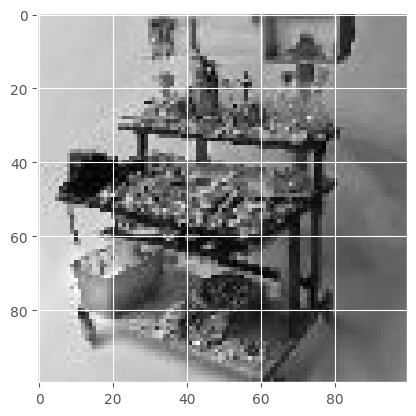

In [7]:
plt.imshow(img[:, :, 0], cmap='gray') # Red Channel

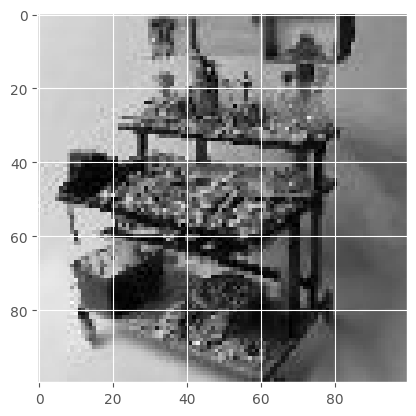

In [8]:
plt.imshow(img[:, :, 1], cmap='gray') # Green Channel

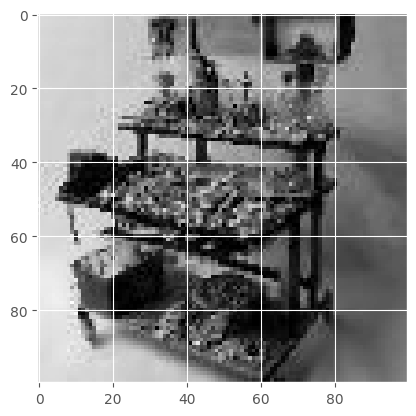

In [9]:
plt.imshow(img[:, :, 2], cmap='gray') # Blue Channel


In [10]:
imgs = [plt.imread(files[file_i])
        for file_i in range(100)]

#imgs = utils.get_celeb_imgs() # nope nope nope

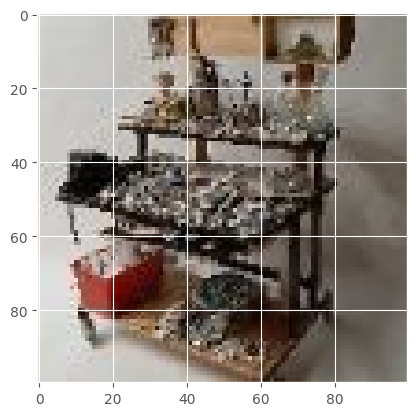

In [11]:
plt.imshow(imgs[99])

In [12]:
imgs[0].shape

(100, 100, 3)

In [13]:
data = np.array(imgs) # make 'data' = our numpy array
data.shape
print(data.shape)
print("The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels")
print("If your images aren't all the same size to begin with, then this won't work!")


(100, 100, 100, 3)
The shape of our new 'data' object is a 'batch' of 100 images, with a height of 218, width of 178, and 3 colour channels
If your images aren't all the same size to begin with, then this won't work!


look at this average person


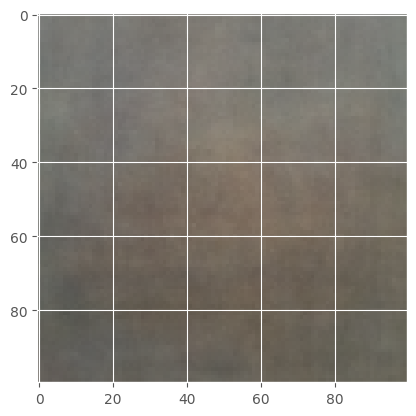

In [14]:
mean_img = np.mean(data, axis=0) # This is the mean of the 'batch' channel
plt.imshow(mean_img.astype(np.uint8))
print("look at this average person")


This is the standard deviation - the variance of the mean


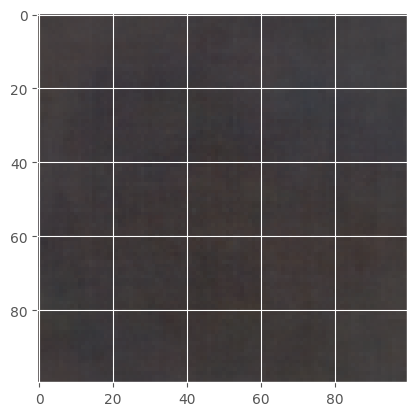

In [15]:
std_img = np.std(data, axis=0)
plt.imshow(std_img.astype(np.uint8))
print("This is the standard deviation - the variance of the mean")


Mean of all colour channels


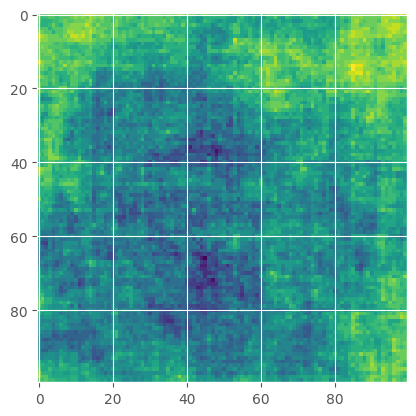

In [16]:
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8)) # Mean of all colour channels
print("Mean of all colour channels")

In [17]:
flattened = data.ravel()
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.ravel.html
print(data[:1])
print(flattened[:10])

[[[[56 55 51]
   [47 46 42]
   [47 46 42]
   ...
   [38 37 35]
   [36 35 33]
   [31 30 28]]

  [[55 54 50]
   [52 51 47]
   [49 48 44]
   ...
   [39 38 36]
   [39 38 36]
   [38 37 35]]

  [[51 50 46]
   [56 55 51]
   [49 48 44]
   ...
   [46 45 43]
   [48 47 45]
   [49 48 46]]

  ...

  [[74 72 73]
   [66 64 65]
   [64 62 63]
   ...
   [56 50 50]
   [58 52 52]
   [64 58 58]]

  [[76 74 75]
   [68 66 67]
   [65 63 64]
   ...
   [66 60 60]
   [68 62 62]
   [74 68 68]]

  [[80 78 79]
   [72 70 71]
   [68 66 67]
   ...
   [78 72 72]
   [78 72 72]
   [83 77 77]]]]
[56 55 51 47 46 42 47 46 42 49]


(array([28674.,  4716.,  4611.,  4706.,  5170.,  5757.,  5817.,  6408.,
         7145.,  7626.,  8234.,  8751.,  9095.,  9275.,  9805.,  9822.,
         9986., 10352., 10721., 11043., 11603., 12365., 12731., 13224.,
        13737., 13649., 13800., 13683., 13920., 13983., 14096., 13987.,
        14262., 14421., 14711., 14686., 14817., 14984., 15053., 15278.,
        15484., 15506., 15669., 15667., 15567., 15666., 15913., 15393.,
        15558., 15615., 15495., 15400., 15417., 15707., 15362., 15934.,
        15677., 16128., 16032., 16074., 16098., 16169., 16277., 15934.,
        16270., 16345., 16575., 16295., 16336., 16177., 16179., 16413.,
        16238., 16480., 16019., 16236., 16153., 16347., 16158., 16355.,
        16520., 16666., 16632., 16808., 16559., 16441., 16440., 16643.,
        16407., 16272., 16120., 15954., 16112., 16031., 15807., 15967.,
        15816., 16280., 15993., 16150., 16337., 16394., 16186., 15829.,
        16012., 15817., 15653., 15967., 15766., 15975., 16034., 

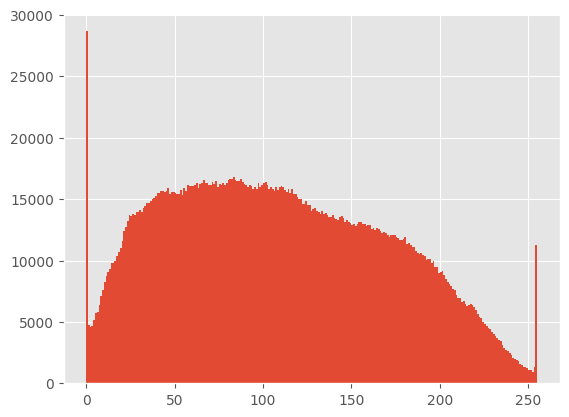

In [18]:
plt.hist(flattened.ravel(), 255)

(array([  2.,   0.,   1.,   0.,   1.,   3.,   5.,   5.,   5.,   5.,   8.,
          6.,  13.,   5.,   9.,  17.,   9.,  17.,  15.,  28.,  20.,  36.,
         36.,  40.,  40.,  41.,  33.,  51.,  58.,  59.,  65.,  78.,  67.,
         75.,  67.,  77.,  98.,  86., 100.,  95., 108., 103.,  98.,  89.,
         96., 100., 106., 107.,  95.,  93.,  99., 128., 113.,  94., 121.,
        114., 124., 104.,  95., 126., 113., 136., 147., 134., 133., 138.,
        151., 141., 124., 158., 167., 175., 161., 181., 168., 168., 179.,
        173., 152., 180., 187., 198., 209., 173., 197., 188., 186., 206.,
        182., 208., 212., 199., 175., 167., 182., 173., 183., 198., 158.,
        170., 181., 156., 150., 155., 137., 158., 144., 151., 153., 156.,
        139., 145., 138., 159., 146., 135., 126., 147., 156., 160., 154.,
        147., 140., 164., 125., 140., 128., 137., 150., 146., 150., 149.,
        126., 158., 158., 166., 153., 145., 152., 166., 184., 172., 158.,
        207., 208., 176., 190., 186., 

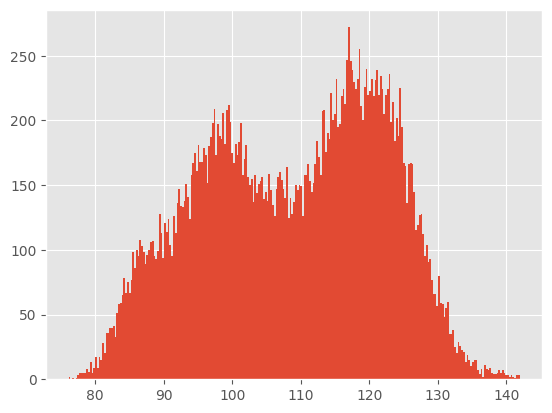

In [19]:
plt.hist(mean_img.ravel(), 255)

Text(0.5, 1.0, '(img - mean) distribution')

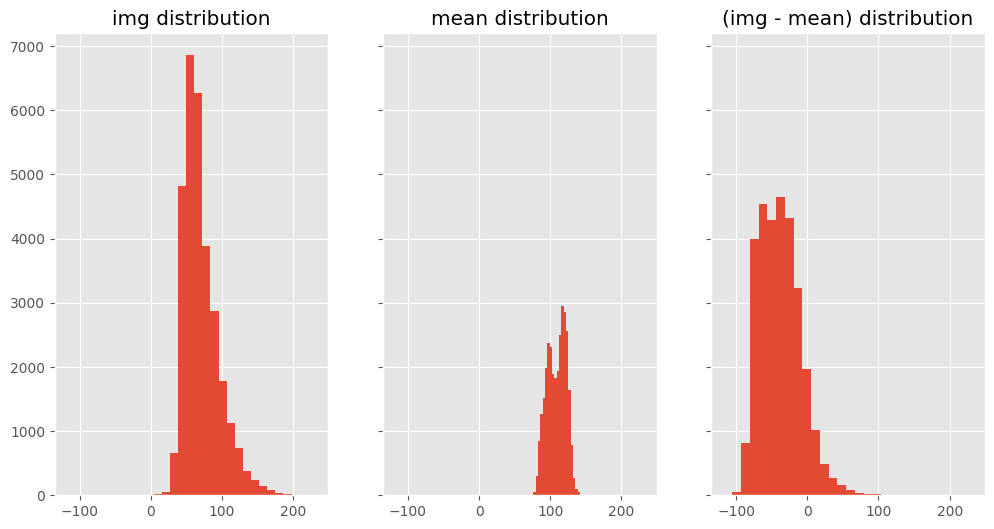

In [20]:
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

Text(0.5, 1.0, '((img - mean) / std_dev) distribution')

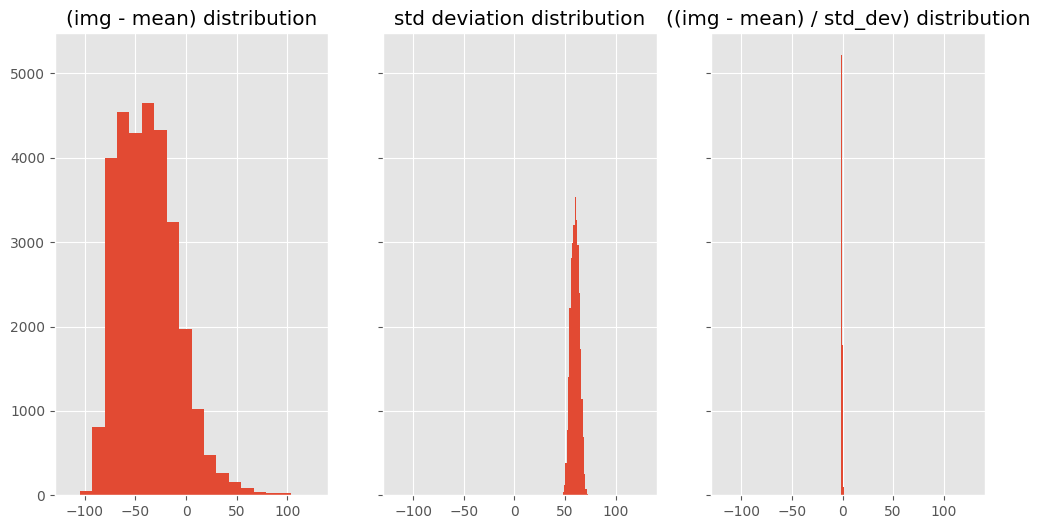

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

In [22]:
axs[2].set_xlim([-150, 150])
axs[2].set_xlim([-100, 100])
axs[2].set_xlim([-50, 50])
axs[2].set_xlim([-10, 10])
axs[2].set_xlim([-5, 5])

(-5.0, 5.0)

In [23]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

2023-02-22 13:18:13.086322: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
non-resource variables are not supported in the long term


In [24]:
x = np.linspace(-3.0, 3.0, 100)

# Immediately, the result is given to us.  An array of 100 numbers equally spaced from -3.0 to 3.0.
print(x)

# We know from numpy arrays that they have a `shape`, in this case a 1-dimensional array of 100 values
print(x.shape)

# and a `dtype`, in this case float64, or 64 bit floating point values.
print(x.dtype)

[-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576 -2.6969697
 -2.63636364 -2.57575758 -2.51515152 -2.45454545 -2.39393939 -2.33333333
 -2.27272727 -2.21212121 -2.15151515 -2.09090909 -2.03030303 -1.96969697
 -1.90909091 -1.84848485 -1.78787879 -1.72727273 -1.66666667 -1.60606061
 -1.54545455 -1.48484848 -1.42424242 -1.36363636 -1.3030303  -1.24242424
 -1.18181818 -1.12121212 -1.06060606 -1.         -0.93939394 -0.87878788
 -0.81818182 -0.75757576 -0.6969697  -0.63636364 -0.57575758 -0.51515152
 -0.45454545 -0.39393939 -0.33333333 -0.27272727 -0.21212121 -0.15151515
 -0.09090909 -0.03030303  0.03030303  0.09090909  0.15151515  0.21212121
  0.27272727  0.33333333  0.39393939  0.45454545  0.51515152  0.57575758
  0.63636364  0.6969697   0.75757576  0.81818182  0.87878788  0.93939394
  1.          1.06060606  1.12121212  1.18181818  1.24242424  1.3030303
  1.36363636  1.42424242  1.48484848  1.54545455  1.60606061  1.66666667
  1.72727273  1.78787879  1.84848485  1.90909091  1.9

In [25]:
x = tf.linspace(-3.0, 3.0, 100)
print(x)

Tensor("linspace/Slice:0", shape=(100,), dtype=float32)


In [26]:
g = tf.get_default_graph()

In [27]:
[op.name for op in g.get_operations()]

['linspace/start',
 'linspace/stop',
 'linspace/num',
 'linspace/Cast',
 'linspace/Cast_1',
 'linspace/Shape',
 'linspace/Shape_1',
 'linspace/BroadcastArgs',
 'linspace/BroadcastTo',
 'linspace/BroadcastTo_1',
 'linspace/ExpandDims/dim',
 'linspace/ExpandDims',
 'linspace/ExpandDims_1/dim',
 'linspace/ExpandDims_1',
 'linspace/Shape_2',
 'linspace/Shape_3',
 'linspace/strided_slice/stack',
 'linspace/strided_slice/stack_1',
 'linspace/strided_slice/stack_2',
 'linspace/strided_slice',
 'linspace/add/y',
 'linspace/add',
 'linspace/SelectV2/condition',
 'linspace/SelectV2/t',
 'linspace/SelectV2',
 'linspace/sub/y',
 'linspace/sub',
 'linspace/Maximum/y',
 'linspace/Maximum',
 'linspace/sub_1/y',
 'linspace/sub_1',
 'linspace/Maximum_1/y',
 'linspace/Maximum_1',
 'linspace/sub_2',
 'linspace/Cast_2',
 'linspace/truediv',
 'linspace/GreaterEqual/y',
 'linspace/GreaterEqual',
 'linspace/SelectV2_1/e',
 'linspace/SelectV2_1',
 'linspace/range/start',
 'linspace/range/delta',
 'linspace/ra

In [28]:
g.get_tensor_by_name('linspace/Slice' + ':0')

<tf.Tensor 'linspace/Slice:0' shape=(100,) dtype=float32>

In [29]:
# We're first going to create a session:
sess = tf.Session()

# Now we tell our session to compute anything we've created in the tensorflow graph.
computed_x = sess.run(x)
print(computed_x)

# Alternatively, we could tell the previous Tensor to evaluate itself using this session:
computed_x = x.eval(session=sess)
print(computed_x)

# We can close the session after we're done like so:
sess.close()

[-3.         -2.939394   -2.878788   -2.8181818  -2.7575758  -2.6969697
 -2.6363635  -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.3333333
 -2.2727273  -2.2121212  -2.151515   -2.090909   -2.030303   -1.969697
 -1.9090909  -1.8484848  -1.7878788  -1.7272727  -1.6666666  -1.6060605
 -1.5454545  -1.4848485  -1.4242424  -1.3636363  -1.3030303  -1.2424242
 -1.1818181  -1.121212   -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.6969695  -0.6363635  -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.151515
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.2727275   0.3333335   0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.757576    0.818182    0.878788    0.939394
  1.          1.060606    1.121212    1.1818185   1.2424245   1.3030305
  1.3636365   1.4242425   1.4848485   1.5454545   1.606061    1.666667
  1.727273    1.787879    1.848485    1.909091    1.969697    2.0

2023-02-22 13:18:19.499018: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-22 13:18:19.504472: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled


In [30]:
sess = tf.Session(graph=g)
sess.close()

In [31]:
g2 = tf.Graph()

In [32]:
sess = tf.InteractiveSession()
x.eval()

array([-3.        , -2.939394  , -2.878788  , -2.8181818 , -2.7575758 ,
       -2.6969697 , -2.6363635 , -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.3333333 , -2.2727273 , -2.2121212 , -2.151515  ,
       -2.090909  , -2.030303  , -1.969697  , -1.9090909 , -1.8484848 ,
       -1.7878788 , -1.7272727 , -1.6666666 , -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.4242424 , -1.3636363 , -1.3030303 , -1.2424242 ,
       -1.1818181 , -1.121212  , -1.060606  , -1.        , -0.939394  ,
       -0.87878776, -0.81818175, -0.75757575, -0.6969695 , -0.6363635 ,
       -0.5757575 , -0.5151515 , -0.4545455 , -0.39393926, -0.33333325,
       -0.27272725, -0.21212101, -0.151515  , -0.090909  , -0.030303  ,
        0.030303  ,  0.09090924,  0.15151525,  0.21212125,  0.2727275 ,
        0.3333335 ,  0.3939395 ,  0.4545455 ,  0.5151515 ,  0.57575774,
        0.63636374,  0.69696975,  0.757576  ,  0.818182  ,  0.878788  ,
        0.939394  ,  1.        ,  1.060606  ,  1.121212  ,  1.18

In [33]:
# We can find out the shape of a tensor like so:
print(x.get_shape())

# %% Or in a more friendly format
print(x.get_shape().as_list())

(100,)
[100]


In [34]:
# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0.0
sigma = 1.0

# Don't worry about trying to learn or remember this formula.  I always have to refer to textbooks or check online for the exact formula.
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

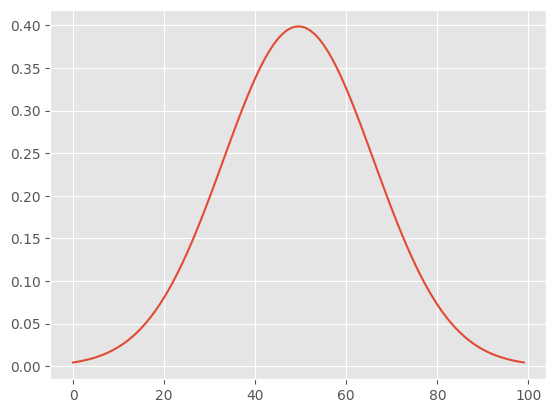

In [35]:
res = z.eval()
plt.plot(res)
# if nothing is drawn, and you are using ipython notebook, uncomment the next two lines:
#%matplotlib inline
#plt.plot(res)

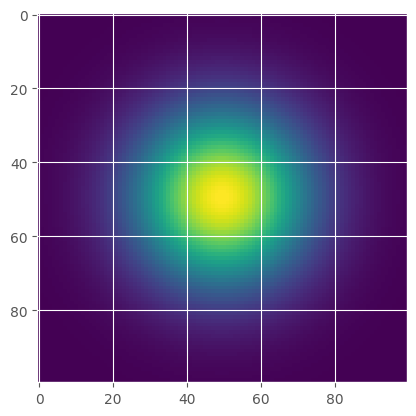

In [36]:
# Let's store the number of values in our Gaussian curve.
ksize = z.get_shape().as_list()[0]

# Let's multiply the two to get a 2d gaussian
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

# Execute the graph
plt.imshow(z_2d.eval())